1200x630 px


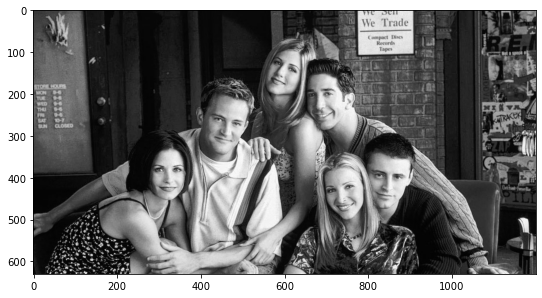

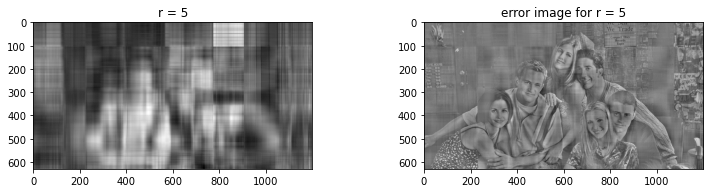

Compression ratio: 1.21%



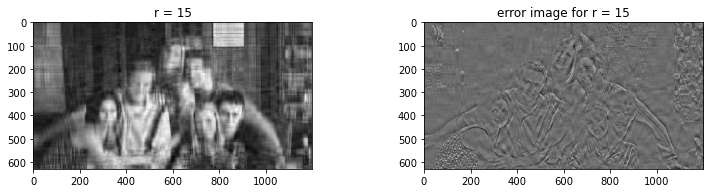

Compression ratio: 3.63%



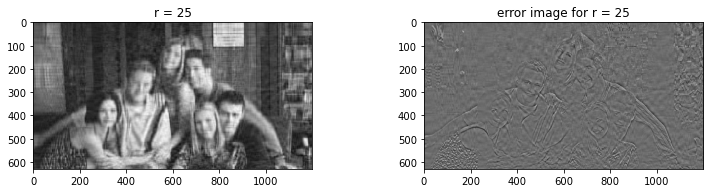

Compression ratio: 6.05%



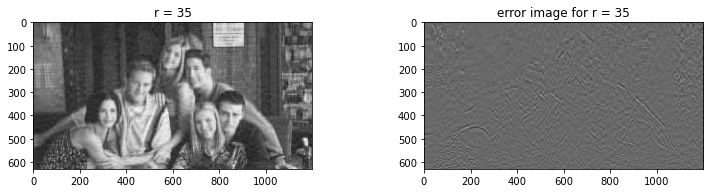

Compression ratio: 8.48%



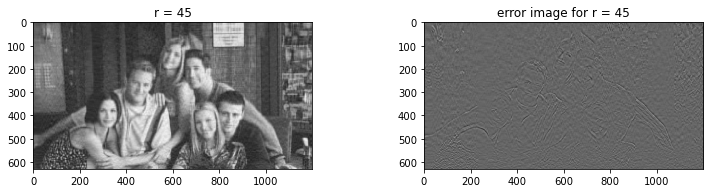

Compression ratio: 10.90%



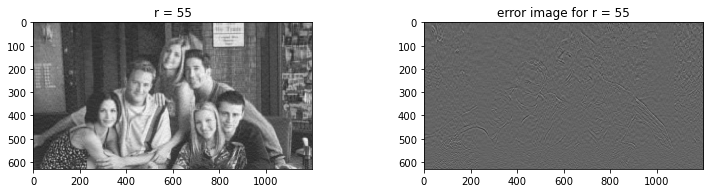

Compression ratio: 13.32%



In [2]:
@:author: Kikiann
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Converting to Black and White
img = Image.open('friends.jpg').convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(img)

print('%sx%s px' %(img.size[0], img.size[1]))

#Converting image data into numpy matrix
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)

#calculate the compression ratio of an compressed image to the original image
def compression_ratio(i, m, n):
    comp_bytes = i * (m + n) + i

    return (comp_bytes / (m * n)) * 100

#sigma has all singular values of the img
U, sigma, V = np.linalg.svd(imgmat)

#dimensions of the matrix
m = float(imgmat.shape[0])
n = float(imgmat.shape[1])

for i in range(5, 56, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    cr = compression_ratio(i, m, n)

    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(1, 2, 1)
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)

    plt.subplot(1, 2, 2)
    erroring = imgmat - reconstimg    #to show error image
    plt.imshow(erroring, cmap='gray')
    title = "error image for r = %s" % i
    plt.title(title)

    plt.show()

    print("Compression ratio: %.2f" %cr + str('%'))
    print('')